# Statistical Analysis of report

## Load report

In [24]:
import utils
import numpy as np
directory = r'C:\Users\s3628075\Study\Fujisaki\DataBase\enterface\All/'
report = utils.load_obj(directory+'Fujisaki_Params.pkl')
fnames, params = zip(*report.items())
fnames = np.array(fnames)
Fb = a = b = I = J = Aa_all = Ap_all = np.empty(1)
for p in params:
    Fb= np.append(Fb, p['Fb'])
    a = np.append(a, p['a'])
    b = np.append(b, p['b'])
    I = np.append(I, p['I'])
    J = np.append(J, p['J'])
    Aa_all = np.append(Aa_all, p['Aa'])
    Ap_all = np.append(Ap_all, p['Ap'])
print("Loading report completed")

Loading report completed


## Look at how parameters are distributed across the whole corpus

Aa length: 5222; min_value: -3.6719; max_value: 2.1146
Ap length: 1515; min_value: 0.0; max_value: 5.3625


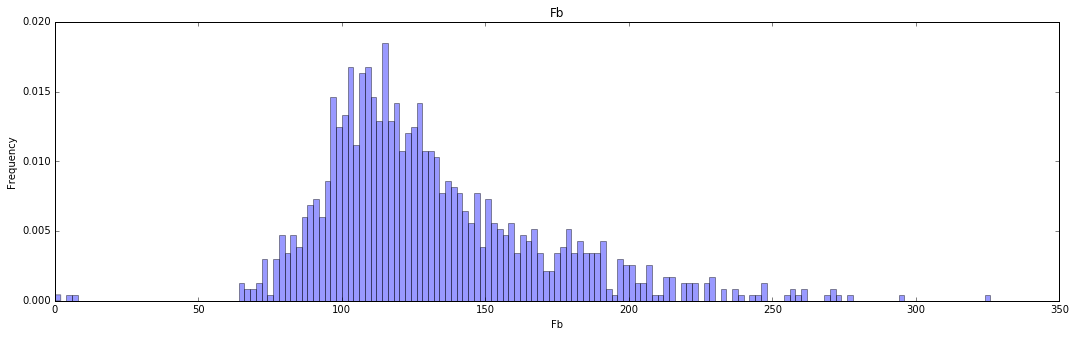

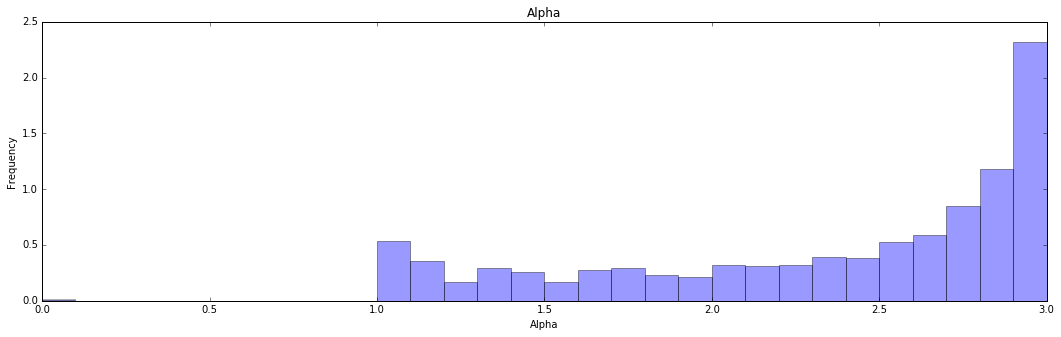

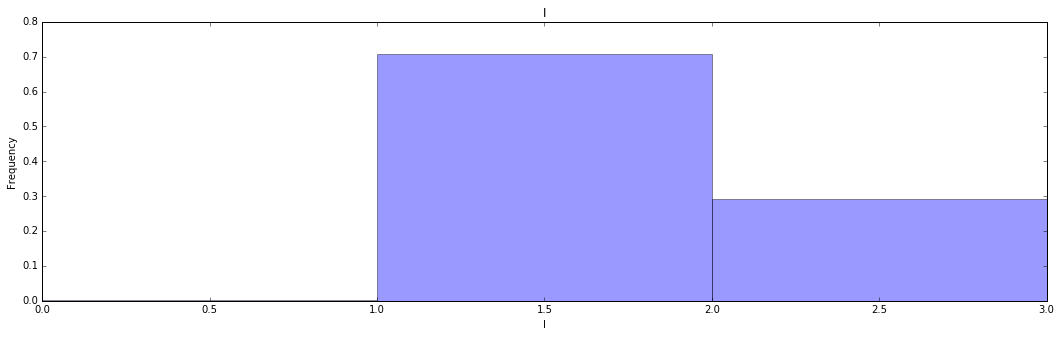

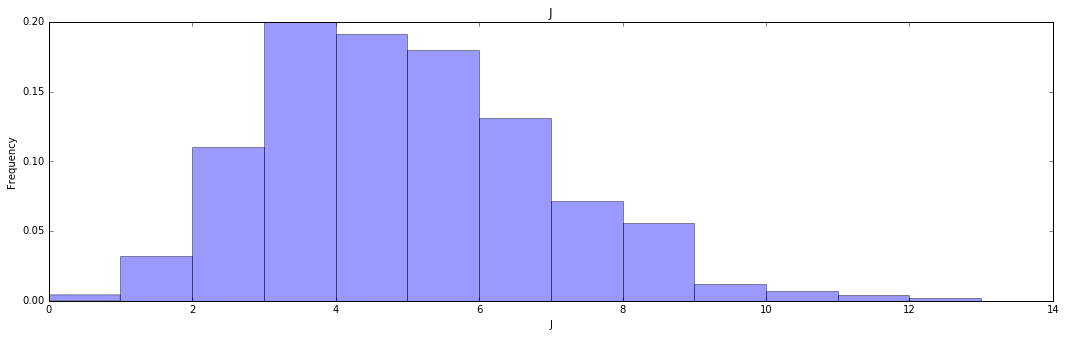

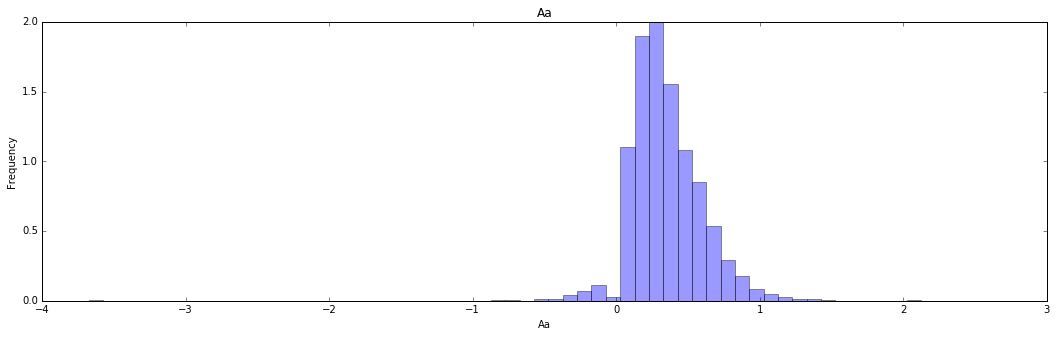

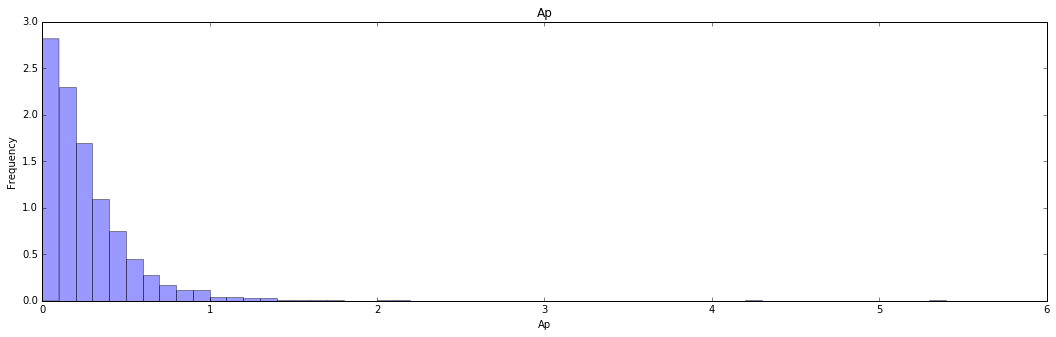

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
# plot Fb
hFb = utils.plot_hist(Fb, "Fb", 2.0)
# plot a
ha = utils.plot_hist(a, "Alpha", 0.1)
# plot I
hI = utils.plot_hist(I, "I", 1.0)
# plot J
hJ = utils.plot_hist(J, "J", 1.0)
# plot Aa
hAa = utils.plot_hist(Aa_all, "Aa", 0.1, verbose=True)
# plot Ap
hAp = utils.plot_hist(Ap_all, "Ap", 0.1, verbose=True)
plt.show()

## Calculate error

In [27]:
# load emotions.pkl and subjects.pkl utils.load_obj()

emotions = utils.load_obj(directory+'emotions.pkl')
subjects = utils.load_obj(directory+'subjects.pkl')
rmse = utils.load_obj(directory+'RMSE.pkl')


## Error distribution across emotions

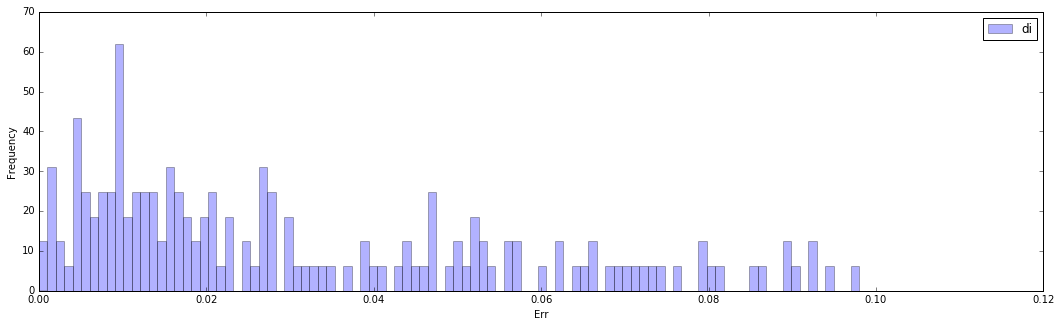

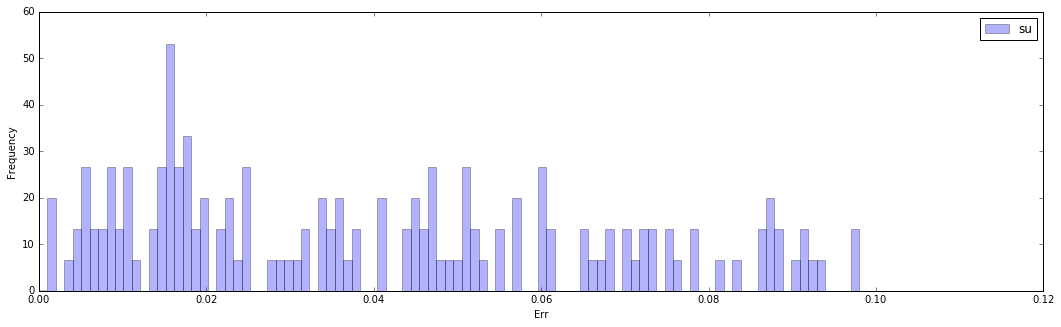

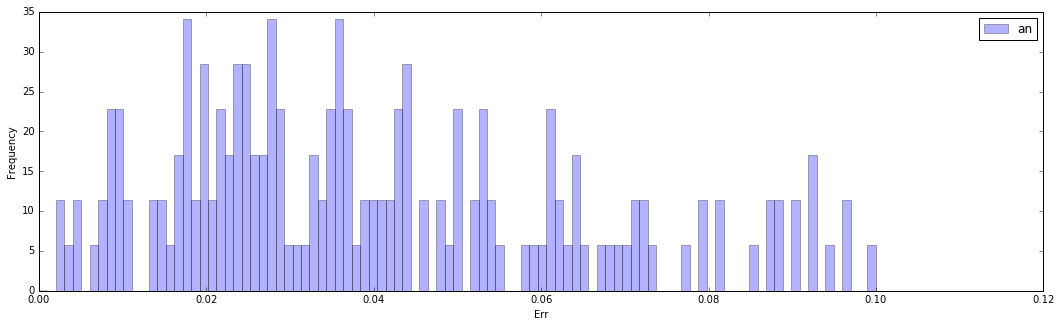

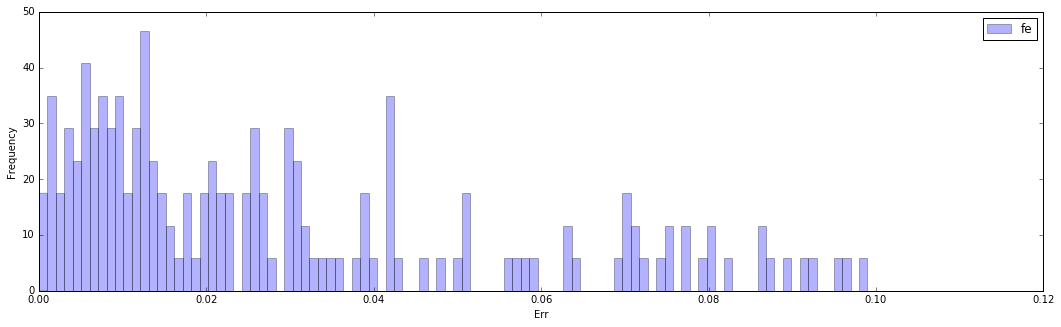

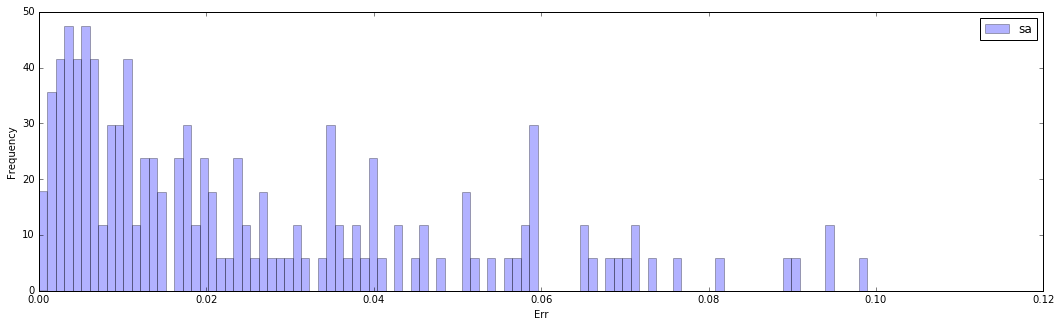

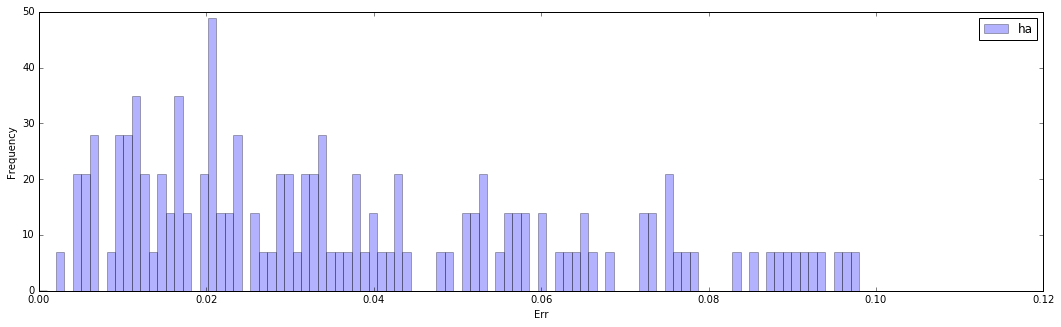

In [28]:
bins = np.linspace(0, 0.1, 100) 
for key in emotions.keys():
    plt.figure(figsize=(18,5))
    plt.hist(emotions[key], bins, alpha = 0.3, label=str(key), normed=True)
    plt.xlabel('Err')
    plt.ylabel('Frequency')
    plt.legend(loc = 'upper right')
    plt.show()

## Error distribution across subjects

In [32]:
bins = np.linspace(0, 0.1, 100) 
for key in subjects.keys():
    print key
    if int(key) % 10 == 0:
        plt.figure(figsize=(18,5))
        plt.hist(subjects[key], bins, alpha = 0.3, label=str(key), normed=True)
        plt.xlabel('Err')
        plt.ylabel('Frequency')
        plt.legend(loc = 'upper right')
        plt.show()

## t-Test (difference of error through neutral and emotional speech)

In [30]:
import scipy.stats as st
import prettytable
t_test = np.empty(0, dtype=[('E1', 'a10'), ('E2', 'a10'), ('T', 'f'), ('P', 'f')])
for e in emotions.keys():
    for e2 in emotions.keys():
        test = st.ttest_ind(emotions[e], emotions[e2], equal_var = False)
        t_test = np.append(t_test, np.array([(e, e2, test[0], test[1])], dtype=t_test.dtype))
pretty_tbl = prettytable.PrettyTable(t_test.dtype.names)
for r in t_test:
    pretty_tbl.add_row(r)
print(pretty_tbl)

+----+----+------------+-------------+
| E1 | E2 |     T      |      P      |
+----+----+------------+-------------+
| di | di |    nan     |     nan     |
| di | su |    nan     |     nan     |
| di | an |    nan     |     nan     |
| di | fe |    nan     |     nan     |
| di | sa |    nan     |     nan     |
| di | ha |    nan     |     nan     |
| su | di |    nan     |     nan     |
| su | su |    0.0     |     1.0     |
| su | an |  3.32787   | 0.000991973 |
| su | fe |  4.14863   | 4.34819e-05 |
| su | sa |  3.73287   | 0.000219989 |
| su | ha |  1.22595   |    0.221    |
| an | di |    nan     |     nan     |
| an | su |  -3.32787  | 0.000991973 |
| an | an |    0.0     |     1.0     |
| an | fe |  1.42978   |   0.153596  |
| an | sa |  1.09523   |   0.274228  |
| an | ha |  -2.20246  |  0.0284019  |
| fe | di |    nan     |     nan     |
| fe | su |  -4.14863  | 4.34819e-05 |
| fe | an |  -1.42978  |   0.153596  |
| fe | fe |    0.0     |     1.0     |
| fe | sa | -0.0742322 | 